<a href="https://colab.research.google.com/github/SaketMunda/certifications/blob/master/tensorflow_developer_cert_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Developer Certificate Exam Practice

This notebook covers the practice of topics mentioned in [TensorFlow Candidate Handbook](https://www.tensorflow.org/static/extras/cert/TF_Certificate_Candidate_Handbook.pdf) for the tensorflow developer certification.


## (1) Build and train neural network models using TensorFlow 2.x

You need to understand the foundational principles of machine learning (ML) and deep learning (DL) using TensorFlow 2.x. You need to know how to:

- [x]  Use TensorFlow 2.x.
- [x]  Build, compile and train machine learning (ML) models using TensorFlow.
- [x]  Preprocess data to get it read for use in a model.
- [x]  Use the models to predict results.
- [x]  Build sequential models with multiple layers.
- [x]  Build and train models for binary classification.
- [x]  Build and train models for multi-class classification.
- [x]  Plot loss and accuracy of a trained model.
- [x]  Identify strategies to prevent overfitting, including augmentation and dropout.
- [ ]  Use pretrained models (transfer learning).
- [ ]  Extract features from pre-trained models.
- [ ]  Ensure that inputs to a model are in the correct shape.
- [ ]  Ensure that you can match test data to the input shape of a neural network.
- [ ]  Ensure you can match output data of a neural network to specified input shape for test data.
- [x]  Understand batch loading of data.
- [x]  Use callbacks to trigger the end of training cycles.
- [x]  Use datasets from different sources.
- [ ]  Use datasets in different formats, including json and csv.
- [x]  Use datasets from tf.data.datasets.

### Use TensorFlow 2.x

In [ ]:
import tensorflow as tf

tf.__version__

'2.12.0'

### Build, compile and train machine learning (ML) models using TensorFlow.

For this we can create our own dataset using Scikit-Learn's datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [ ]:
# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=17)

X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Check the values
X[:10], y[:10]

(array([[-0.69661282, -0.32845725],
        [ 0.95581012, -0.05841444],
        [ 0.53469756, -0.57338982],
        [-0.89332834,  0.42098993],
        [-0.65647965, -0.4353153 ],
        [ 0.61190346,  0.8002305 ],
        [-0.59835762, -0.56745289],
        [ 0.33167887,  0.92232011],
        [ 0.78275051, -0.13574349],
        [ 0.57968601,  0.84258556]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0]))

In [ ]:
# let's visualize the data
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})

circles.head()

,X0,X1,label
0,-0.696613,-0.328457,1
1,0.955810,-0.058414,0
2,0.534698,-0.573390,1
3,-0.893328,0.420990,0
4,-0.656480,-0.435315,1


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

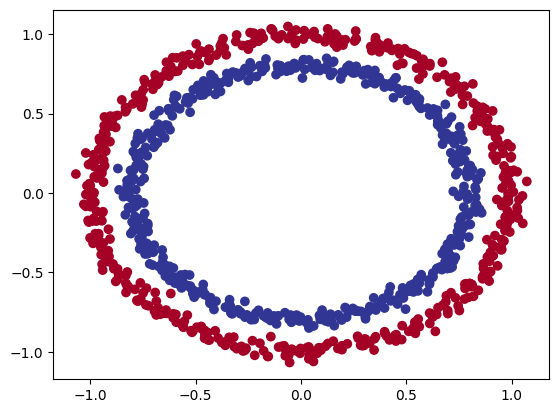

In [ ]:
# let's plot it
plt.scatter(circles["X0"], circles["X1"], c=y, cmap='RdYlBu');

From the plot we can observe that the problem we're going to solve is binary classification.

In [ ]:
# let's train the model but first need to split the train and test
from sklearn.model_selection import train_test_split

X = circles.drop(labels=['label'], axis=1)
y = circles['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape

((800, 2), (800,))

In [ ]:
# let's build a model
tf.random.set_seed(17)

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile a model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit a model
model.fit(X_train,
          y_train,
          epochs=100,
          verbose=0,
          validation_data=(X_test, y_test))

In [ ]:
# evaluate the model
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.7109 - accuracy: 0.5200


[0.7109042406082153, 0.5199999809265137]

### Preprocess data to get it read for use in a model

Preprocessing means a series of functions to prepare your data for use with neural networks

### Use the models to predict results

We can take further the circle classification model and then make them predict, so let's build it once again.

In [ ]:
# set the random seed
tf.random.set_seed(17)

# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'), # 1 hidden layer with activation function relu
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # sigmoid for binary classification
])

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit the model
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    verbose=0,
                    validation_data=(X_test, y_test))

model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3627 - accuracy: 0.8550


[0.3626924157142639, 0.8550000190734863]

In [ ]:
# see the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# use the model to predict
import numpy as np

y_preds = model.predict(X_test)

y_preds = tf.round(y_preds)

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)>

In [ ]:
y_test[:10]

641    1
833    0
113    1
123    1
341    1
449    1
441    1
763    1
390    0
394    1
Name: label, dtype: int64

In [ ]:
# get the confusion matrix evaluation
tf.math.confusion_matrix(y_test, tf.round(y_preds)).numpy()

array([[82, 22],
       [ 7, 89]], dtype=int32)

### Build and Train Multi-class classification Model

For this we are going to import [Fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) multiclass classification dataset to build our model.

In [ ]:
# import the data
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# let's view the data and it's shape
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Here 28, 28 means the input is in 28 * 28 grayscale image

In [ ]:
train_data[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

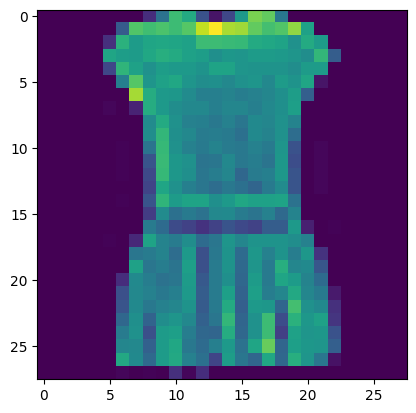

In [ ]:
# plot this
import matplotlib.pyplot as plt
plt.imshow(train_data[3]);

In [ ]:
train_labels[3]

3

Since these are some category or number, let's make this into human readable labels. Let's create a dataset for that as `class_names`

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [ ]:
class_names[train_labels[3]]

'Dress'

In [ ]:
train_data[2].shape

(28, 28)

So now in this way can read the output of our train labels and test labels. Next, let's build the model.

In [ ]:
# set the random seed
tf.random.set_seed(17)

# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit the model
history = model.fit(train_data,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4181 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 3140      
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


We can normalize the inputs since the range of numbers in the input is between 0-256, so if we normalize and shrink it between 0-1 and try building our model again.

In [ ]:
train_data[2].max(), train_data[2].min()

(255, 0)

In [ ]:
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()


train_data_norm.max(), train_data_norm.min()

(1.0, 0.0)

In [ ]:
train_data_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

now let's build the model again

In [ ]:
# random seed
tf.random.set_seed(17)

# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

# fit the model
history = model.fit(train_data_norm,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.1401 - accuracy: 0.5590 - val_loss: 0.7910 - val_accuracy: 0.6917
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7120 - accuracy: 0.7329 - val_loss: 0.6766 - val_accuracy: 0.7676
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6115 - accuracy: 0.7856 - val_loss: 0.6245 - val_accuracy: 0.7851
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5704 - accuracy: 0.8019 - val_loss: 0.5895 - val_accuracy: 0.7945
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5520 - accuracy: 0.8086 - val_loss: 0.5910 - val_accuracy: 0.7974
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5415 - accuracy: 0.8118 - val_loss: 0.5954 - val_accuracy: 0.7948
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5335 - accuracy: 0.8156 - val_loss: 0.5692 - val_accuracy:

### Plot Loss and Accuracy curves

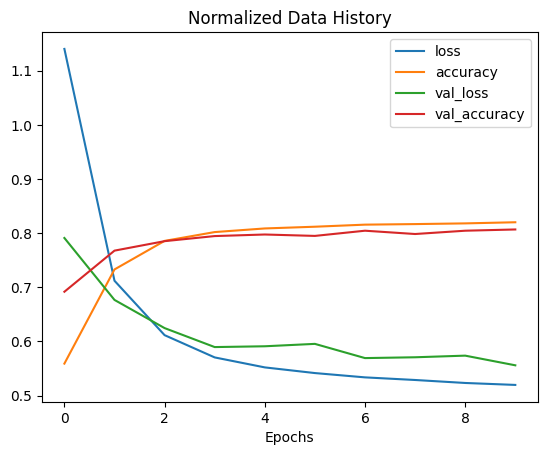

In [ ]:
pd.DataFrame(history.history).plot(title='Normalized Data History')
plt.xlabel("Epochs");

### Identify strategies to prevent overfitting, including augmentation and dropout

When we say, a model is **overfitting** it means that model is way good at learning the training dataset that when new data is sent for prediction it doesn't produces good results as compared to training dataset.

So there are some strategies which we can use to prevent overfitting like,
- Data augmentation during preprocessing the data or training the model.
- Also we can use dropout layers
- Add Regularization layers (such as MaxPool2D)
- Add more data..
- so on..




In [ ]:
# data augmentation
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.RandomRotation(0.2),
# ])

# let build the model again and use data_augmentation as the layer of the network
model = tf.keras.Sequential([
    #data_augmentation,
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# fit the model
history = model.fit(train_data_norm,
                    train_labels,
                    epochs=20,
                    validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3458 - accuracy: 0.5276 - val_loss: 0.9247 - val_accuracy: 0.6980
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7667 - accuracy: 0.7402 - val_loss: 0.6996 - val_accuracy: 0.7650
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6596 - accuracy: 0.7743 - val_loss: 0.6653 - val_accuracy: 0.7739
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6253 - accuracy: 0.7862 - val_loss: 0.6371 - val_accuracy: 0.7820
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6095 - accuracy: 0.7893 - val_loss: 0.6316 - val_accuracy: 0.7833
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5983 - accuracy: 0.7937 - val_loss: 0.6294 - val_accuracy: 0.7821
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5905 - accuracy: 0.7969 - val_loss: 0.6345 - val_accuracy:

## (2) Image classification

You need to understand how to build image recognition and object detection models with deep neural
networks and convolutional neural networks using TensorFlow 2.x. You need to know how to:

- [x] Define Convolutional neural networks with Conv2D and pooling layers.
- [x] Build and train models to process real-world image datasets.
- [x] Understand how to use convolutions to improve your neural network.
- [x] Use real-world images in different shapes and sizes..
- [x] Use image augmentation to prevent overfitting.
- [x] Use ImageDataGenerator.
- [x] Understand how ImageDataGenerator labels images based on the directory structure

In [ ]:
# let's import some helper functions

# Get helper_functions.py script from Github
!wget https://raw.githubusercontent.com/SaketMunda/ml-helpers/master/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, unzip_data, walk_through_dir, plot_loss_curves

--2023-09-06 04:43:42--  https://raw.githubusercontent.com/SaketMunda/ml-helpers/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2904 (2.8K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   2.84K  --.-KB/s    in 0s      

2023-09-06 04:43:42 (52.1 MB/s) - ‘helper_functions.py’ saved [2904/2904]



In [ ]:
import zipfile

# Download the zipfile of 10 food classes images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-09-06 04:43:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.207, 108.177.126.207, 74.125.143.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  39.6MB/s    in 13s     

2023-09-06 04:43:58 (38.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

### Define Convolutional neural networks with Conv2D and pooling layers

CNN is a special kind of network which is used for computer vision (detecting patterns in visual data).

Convolutional neural network learn features and patterns by themselves, we don't need to tell them learn this or that feature.

**(typical)* Architecture of CNN:**

| Hyperparameter / Layer Type | What does it do ? | Typical Values |
|--|--|--|
|Input image (s)| Target images you'd like to discover patterns in | Whatever you can take a photo (or video) of |
|Input layer|Takes in target images and preprocess them for further layers| `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important feature from target images | Multiple, can create with tf.keras.ConvXD (X can be 1D, 2D, 3D based on the input) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU |
| Pooling layer | Reduces the dimensionality of learned image features | Average [tf.keras.layers.AvgPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D) or Max [tf.keras.layers.MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) |
| Fully connected layer | Further refines learned features from convolution layers | [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi) |
| Output Activation | Adds non-linearities to output layer | [tf.keras.activations.sigmoid](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid)(binary classification) or [tf.keras.activations.softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |




### Build and Train models to process real-world image datasets

We have images of Food, let's visualise them first and then proceed with building the model later.


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


#### Exploring the Food101 dataset from Tensorflow datasets

Let's find out a few details about our dataset,

- The shape of our input data (image tensors)
- The datatype of our input data
- what the labels of our input data look like (e.g one-hot encoded vs label-encoded)
- do the labels match up with the class names ?

In [ ]:
# create a function to view random image
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def view_random_image(target_dir, target_class):
  # setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # get the random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  #print(f"Image shape: {img.shape}") # Show the shape of the image
  #return img

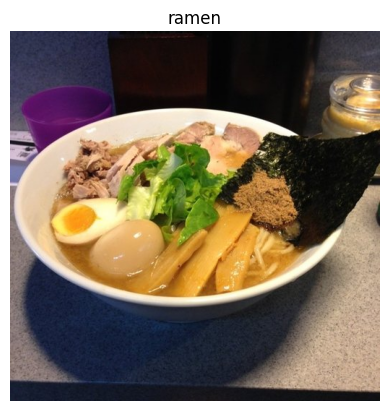

In [ ]:
view_random_image(target_dir = train_dir,
                  target_class = random.choice(class_names))

#### Preprocess the data

There are a couple of preprocessing steps we have to take before it's ready to model,
- convert it in `float32` datatype
- reduce the size to `(224, 224, 3)` and standardize the size
- normalize the tensor between 0 & 255

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turning into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#### Create a model (start with baseline)

In [ ]:
# import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
# create a model
model = Sequential([
        Conv2D(10, 3, input_shape=(224, 224, 3)),
        Activation(activation='relu'),
        Conv2D(10, 3),
        Activation(activation='relu'),
        MaxPool2D(),
        Conv2D(10, 3, activation='relu'),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(10, activation='softmax')
])

# compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=['accuracy'])

# fit the model
history = model.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 124ms/step - loss: 2.1623 - accuracy: 0.2068 - val_loss: 1.9829 - val_accuracy: 0.3008
Epoch 2/5
235/235 [==============================] - 28s 118ms/step - loss: 1.8779 - accuracy: 0.3449 - val_loss: 1.8479 - val_accuracy: 0.3724
Epoch 3/5
235/235 [==============================] - 32s 136ms/step - loss: 1.5108 - accuracy: 0.4933 - val_loss: 1.9243 - val_accuracy: 0.3480
Epoch 4/5
235/235 [==============================] - 28s 119ms/step - loss: 0.8625 - accuracy: 0.7281 - val_loss: 2.3898 - val_accuracy: 0.3156
Epoch 5/5
235/235 [==============================] - 32s 138ms/step - loss: 0.3058 - accuracy: 0.9068 - val_loss: 3.4629 - val_accuracy: 0.2980


Our model is actually overfitting, since it's learning the training data so well and it performing worse in test data. Let's see how the history graph looks like.

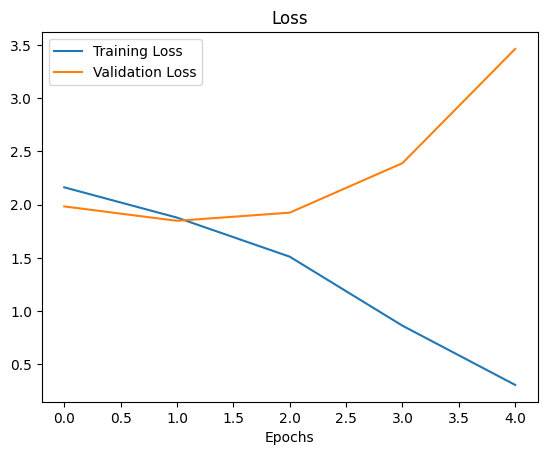

In [ ]:
# plot the loss curves
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epochs')
plt.legend();



What are the things we can implement to prevent the overfitting ?

- Get more data : Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples
- Simlify model : reduce some layers if the architecture is too much complex
- Use data augmentation : Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data.
- Use transfer learning : to leverage the patterns (also called pretrained weights) one model has learned to use as the foundation for your tasks.

Preventing overfitting is also referred to as regularization.

#### Data Augmentation

To create augmented data, we'll create a new `ImageDataGenerator` instance, this time adding some parameters such as `rotation_range`, `zoom_range`, `horizontal_flip` etc to manipulate our images.

In [ ]:
# create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

# create the train data augmented
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# visualize the data
images_augmented, labels_augmented = train_data_augmented.next()
len(images_augmented)

32

In [ ]:
# let's retrain the model

# clone the model
model_augmented = tf.keras.models.clone_model(model)

# compile the model
model_augmented.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                        optimizer=Adam(),
                        metrics=['accuracy'])

# fit the model
history_augmented = model_augmented.fit(train_data_augmented,
                                        epochs=5,
                                        steps_per_epoch=len(train_data_augmented),
                                        validation_data=test_data,
                                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 108s 453ms/step - loss: 2.2610 - accuracy: 0.1517 - val_loss: 2.1731 - val_accuracy: 0.2016
Epoch 2/5
235/235 [==============================] - 105s 447ms/step - loss: 2.1747 - accuracy: 0.2011 - val_loss: 2.0611 - val_accuracy: 0.2516
Epoch 3/5
235/235 [==============================] - 104s 444ms/step - loss: 2.0691 - accuracy: 0.2592 - val_loss: 1.8906 - val_accuracy: 0.3532
Epoch 4/5
235/235 [==============================] - 108s 461ms/step - loss: 2.0091 - accuracy: 0.2921 - val_loss: 1.9446 - val_accuracy: 0.3488
Epoch 5/5
235/235 [==============================] - 105s 446ms/step - loss: 1.9596 - accuracy: 0.3091 - val_loss: 1.8540 - val_accuracy: 0.3452


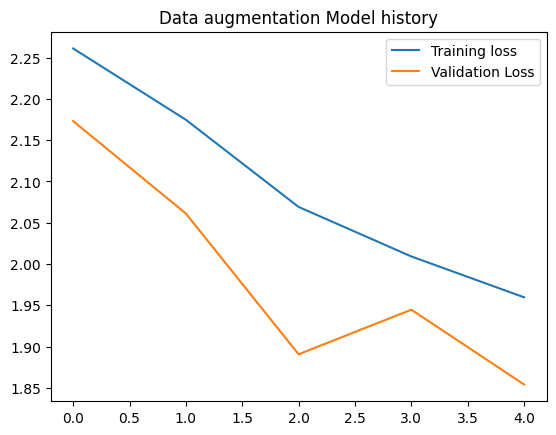

In [ ]:
# Plot the history curves
loss = history_augmented.history['loss']
val_loss = history_augmented.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')

plt.title('Data augmentation Model history')
plt.legend();

I think if we train this model for little longer epochs we can achieve reduce the loss more and also increase the accuracy. So let's create some callback function to store best model performed.

#### Modelling Callback function

1. **Tensorboard Callbacks** : Tensorboard is a tool to visualize different metric plots, training graph visualization, weight histograms, sampled profiling.
2. **Early Stopping** : Used to stop training when a monitored metric has stopped improving
3. **Model Checkpoint** : callback to save the model checkpoints as it's very helpful so that when we achieve that model produced the best result at a particular epoch when revert back to a previous state.
4. **ReducingLROnPlateau** : It monitors a specified metric and when the metric stops improving, it reduce the learning rate by a specified factor.

In [ ]:
import datetime

# tensorboard callbacks
log_dir = "image_classification" + "/" + "experiment_2" + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

# early stopping, stop training if model's loss doesn't improve for 2 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  verbose=1,
                                                  restore_best_weights=True)

# model checkpoint
checkpoint_path = "checkpoint_path/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor='val_loss',
                                                      save_best_only=True)

# ReducingLROnPlateau
reducingLR_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                             factor=0.2, # multiple the learning rate by 0.2 (reduce by 5x)
                                                             patience=2,
                                                             verbose=1,
                                                             min_lr=1e-7)

In [ ]:
# retrain it little longer
callback_model = tf.keras.models.clone_model(model)

callback_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                       optimizer='Adam',
                       metrics=['accuracy'])

history_callback = callback_model.fit(train_data_augmented,
                                      epochs=100,
                                      steps_per_epoch=len(train_data_augmented),
                                      validation_data = test_data,
                                      validation_steps = int(0.15 * len(test_data)),
                                      callbacks=[tensorboard_callback, early_stopping, model_checkpoint, reducingLR_on_plateau])

Epoch 1/100
235/235 [==============================] - ETA: 0s - loss: 2.2095 - accuracy: 0.1716

235/235 [==============================] - 105s 439ms/step - loss: 2.2095 - accuracy: 0.1716 - val_loss: 2.0622 - val_accuracy: 0.2358 - lr: 0.0010
Epoch 2/100
235/235 [==============================] - ETA: 0s - loss: 2.1093 - accuracy: 0.2315

235/235 [==============================] - 106s 448ms/step - loss: 2.1093 - accuracy: 0.2315 - val_loss: 1.9862 - val_accuracy: 0.2585 - lr: 0.0010
Epoch 3/100
235/235 [==============================] - ETA: 0s - loss: 2.0281 - accuracy: 0.2804

235/235 [==============================] - 101s 430ms/step - loss: 2.0281 - accuracy: 0.2804 - val_loss: 1.8757 - val_accuracy: 0.3324 - lr: 0.0010
Epoch 4/100
235/235 [==============================] - ETA: 0s - loss: 1.9730 - accuracy: 0.3105

235/235 [==============================] - 103s 440ms/step - loss: 1.9730 - accuracy: 0.3105 - val_loss: 1.8471 - val_accuracy: 0.3835 - lr: 0.0010
Epoch 5/100
235/235 [==============================] - 100s 425ms/step - loss: 1.9428 - accuracy: 0.3192 - val_loss: 1.8764 - val_accuracy: 0.3210 - lr: 0.0010
Epoch 6/100
235/235 [==============================] - ETA: 0s - loss: 1.9238 - accuracy: 0.3239

235/235 [==============================] - 102s 436ms/step - loss: 1.9238 - accuracy: 0.3239 - val_loss: 1.8274 - val_accuracy: 0.3892 - lr: 0.0010
Epoch 7/100
235/235 [==============================] - ETA: 0s - loss: 1.9041 - accuracy: 0.3417

235/235 [==============================] - 102s 434ms/step - loss: 1.9041 - accuracy: 0.3417 - val_loss: 1.8159 - val_accuracy: 0.4176 - lr: 0.0010
Epoch 8/100
235/235 [==============================] - 104s 443ms/step - loss: 1.8776 - accuracy: 0.3504 - val_loss: 1.8418 - val_accuracy: 0.3835 - lr: 0.0010
Epoch 9/100
235/235 [==============================] - ETA: 0s - loss: 1.8379 - accuracy: 0.3652

235/235 [==============================] - 136s 579ms/step - loss: 1.8379 - accuracy: 0.3652 - val_loss: 1.6836 - val_accuracy: 0.4545 - lr: 0.0010
Epoch 10/100
235/235 [==============================] - 105s 447ms/step - loss: 1.8325 - accuracy: 0.3683 - val_loss: 1.7330 - val_accuracy: 0.4006 - lr: 0.0010
Epoch 11/100
235/235 [==============================] - ETA: 0s - loss: 1.8068 - accuracy: 0.3841

235/235 [==============================] - 107s 456ms/step - loss: 1.8068 - accuracy: 0.3841 - val_loss: 1.6450 - val_accuracy: 0.4006 - lr: 0.0010
Epoch 12/100
235/235 [==============================] - ETA: 0s - loss: 1.8088 - accuracy: 0.3783

235/235 [==============================] - 105s 449ms/step - loss: 1.8088 - accuracy: 0.3783 - val_loss: 1.6009 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 13/100
235/235 [==============================] - 103s 439ms/step - loss: 1.7709 - accuracy: 0.3891 - val_loss: 1.6804 - val_accuracy: 0.4205 - lr: 0.0010
Epoch 14/100
235/235 [==============================] - ETA: 0s - loss: 1.7557 - accuracy: 0.3997Restoring model weights from the end of the best epoch: 12.

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
235/235 [==============================] - 102s 434ms/step - loss: 1.7557 - accuracy: 0.3997 - val_loss: 1.6257 - val_accuracy: 0.4716 - lr: 0.0010
Epoch 14: early stopping


## (3) Natural language processing (NLP)

You need to understand how to use neural networks to solve natural language processing problems
using TensorFlow. You need to know how to:

- [x] Build natural language processing systems using TensorFlow.
- [x] Prepare text to use in TensorFlow models.
- [x] Build models that identify the category of a piece of text using binary categorization
- [ ] Build models that identify the category of a piece of text using multi-class categorization
- [x] Use word embeddings in your TensorFlow model.
- [x] Use LSTMs in your model to classify text for either binary or multi-class categorization.
- [x] Add RNN and GRU layers to your model.
- [x] Use RNNS, LSTMs, GRUs and CNNs in models that work with text.
- [ ] Train LSTMs on existing text to generate text (such as songs and poetry)

NLP has the goal of deriving information out of natural language (could be sequences text or speech).
Another common term for NLP problems is sequence to sequence problems (seq2seq)

### Prepare text to use in TensorFlow model

In [ ]:
# let's import some helper functions

# Get helper_functions.py script from Github
!wget https://raw.githubusercontent.com/SaketMunda/ml-helpers/master/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, unzip_data, walk_through_dir, plot_loss_curves

--2023-09-13 04:45:06--  https://raw.githubusercontent.com/SaketMunda/ml-helpers/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2904 (2.8K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   2.84K  --.-KB/s    in 0s      

2023-09-13 04:45:07 (40.0 MB/s) - ‘helper_functions.py’ saved [2904/2904]



#### Get a Text dataset

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# unzip the data
unzip_data('nlp_getting_started.zip')

--2023-09-13 04:45:14--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 172.253.62.207, 142.251.163.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2023-09-13 04:45:14 (140 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



#### Visualize text data

In [ ]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# check the shapes
train_df.shape, test_df.shape

((7613, 5), (3263, 4))

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**About the data and problem,**

So main idea behind this problem is to identify which tweet is a Disaster and which isn't. So we have a column `text` as a tweet and `target` if 1 then disaster and 0 if not. This is a classification problem in NLP.

In [ ]:
# shuffle the dataset so experiment further, it's a good practice
train_data_shuffled = train_df.sample(frac=1, random_state=17)
train_data_shuffled.head()

,id,keyword,location,text,target
7027,10072,typhoon,NaN,Typhoon Soudelor: When will it hit Taiwan ÛÒ ...,1
318,463,armageddon,NaN,RT @RTRRTcoach: #Love #TrueLove #romance lith ...,0
1681,2425,collide,www.youtube.com?Malkavius2,I liked a @YouTube video from @gassymexican ht...,0
5131,7318,nuclear%20reactor,"New York, New York",Japan's Restart of Nuclear Reactor Fleet Fast ...,1
2967,4262,drowning,"Hendersonville, NC",#ICYMI #Annoucement from Al Jackson... http://...,0


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# how many examples of each class?
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# let's visualize some random samples
import random

random_index = random.randint(0, len(train_data_shuffled) - 5)
for row in train_data_shuffled[['text','target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(disaster)" if target > 0 else "(not a disaster)")
  print(f"Text: {text}")
  print("--------\n")

Target: 1 (disaster)
Text: ÛÏRichmond Coaches were devastated to hear of the death of their second driver Mr Chance who was sittingÛ_: Jam... http://t.co/y5Yhbb0hkf
--------

Target: 1 (disaster)
Text: If i tweet daily #Fukushima #Japan global nuclear disaster&amp; #Chernobyl ppl dont care there is no hope 4 humanity C&gt; http://t.co/MAcob5xLsU
--------

Target: 0 (not a disaster)
Text: ouvindo Peace Love &amp; Armageddon
--------

Target: 0 (not a disaster)
Text: this is the first time a tweet has blown up almost half a day later... RE https://t.co/1BUF0xM53d
--------

Target: 0 (not a disaster)
Text: Germany has  39 gigawatts of installed solar capacity
_One gwatt is about equal to the capacity of a nuclear reactor.
http://t.co/leCZOlkmSV
--------



#### Split the dataset into train and validation set

In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_data_shuffled["text"].to_numpy(),
                                                                            train_data_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=17)

#### Converting text into numbers

Our labels are in numerical form (0 and 1) but our tweets are in string form.

But machine learning algorithm learns only through numbers so we have to convert those tweets/texts into numbers.

In NLP, there are two main concepts for turning text into numbers,

- Tokenization : word level tokenisation or character level tokenization or sub-word level tokenisation, just like one hot encoding
- Embeddings : richer representation of relationships between tokens, either create your own embedding or use pre-learned embedding.

##### Text Vectorization

Mapping words to numbers

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# using the default text vectorization variables
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None)

These are the default settings of TextVectorization, but let's customize it according to our own case.

In [ ]:
# find the average number of tokens (words) in training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# setup text vectorization with custom variables
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

To map our `TextVectorization` instance `text_vectorizer` to our data, we can the `adapt()` method on it whilst passing it our training set.

In [ ]:
# fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# try text vectorizer on a random tweet
random_tweet = random.choice(train_sentences)
print(f"Original text: \n{random_tweet}")
print(f"Vectorized text: \n")
text_vectorizer([random_tweet])

Original text: 
@KurtSchlichter  He's already done it by negotiating with the #1 state of terrorism in the World. What was his hurry in trying to get a deal
Vectorized text: 



<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[2907,  261,  606,  627,   15,   18,    1,   14,    2,  200,  248,
           6,  403,    4,    2]])>

we can also check the unique tokens in our vocabulary using the `get_vocabulary()` method

In [ ]:
# get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 words : {top_5_words}")
print(f"Least 5 words : {bottom_5_words}")

Number of words in vocab: 10000
Top 5 words : ['', '[UNK]', 'the', 'a', 'in']
Least 5 words : ['ovo', 'overåÊhostages', 'overzero', 'overwatch', 'overturns']


##### Embedding

Create an embedding using embedding layer. We can create embedding using the `tf.keras.layers.Embedding` layer.

In [ ]:
tf.random.set_seed(17)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=max_length,
                             name="embedding_1")

In [ ]:
# get a random training sentence
random_sentence = random.choice(train_sentences)
print(f"original text: {random_sentence}")
print(f"embedding version:")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

original text: City implores motorists not to speed after more reports of animal fatalities near nature reserves
-&gt; http://t.co/hiKF8Mkjsn
embedding version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01775035, -0.04649508,  0.03310568, ..., -0.03170983,
          0.01263441,  0.01489623],
        [ 0.02052491,  0.02848437, -0.0172947 , ...,  0.00073361,
          0.00319893, -0.04891649],
        [ 0.02052491,  0.02848437, -0.0172947 , ...,  0.00073361,
          0.00319893, -0.04891649],
        ...,
        [-0.02521794,  0.0031973 ,  0.0362244 , ..., -0.0328081 ,
          0.00994347,  0.02627666],
        [-0.02416562,  0.0177312 ,  0.01907272, ...,  0.02876461,
         -0.00541942,  0.03835703],
        [-0.01517174, -0.04438484, -0.04965448, ..., -0.04952953,
          0.03398586, -0.02015203]]], dtype=float32)>

In [ ]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.01775035, -0.04649508,  0.03310568,  0.04112997, -0.03250102,
       -0.01838206, -0.00399511, -0.03146392, -0.00268846,  0.00215149,
        0.02770131, -0.0405843 ,  0.02462189,  0.03031403, -0.00108001,
       -0.01956636,  0.04654786,  0.0365613 , -0.03529575, -0.00068067,
        0.02807877,  0.03144721,  0.036369  ,  0.02780478,  0.00989681,
       -0.0108204 , -0.01622875,  0.01652246, -0.00620518,  0.03202732,
       -0.04511498,  0.02990825, -0.0074824 ,  0.00180155, -0.02643249,
       -0.01560735,  0.03448299, -0.03094324, -0.03353295,  0.01210891,
       -0.04736794, -0.01189301, -0.02444098,  0.03977727,  0.04809939,
       -0.01927546, -0.03789544, -0.04113525,  0.01008815, -0.0056622 ,
        0.03041807,  0.00798132,  0.03008128,  0.02231182,  0.02174344,
       -0.01683534, -0.00678719,  0.01400975, -0.03047284,  0.03849525,
        0.01865849, -0.01527063,  0.0363586 , -0.02921683,  0.04813132,
       -0.002245

#### Evaluation Function for our modelling experiments

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1-score for a binary classification model
  """
  model_accuracy = accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  return {"accuracy": model_accuracy * 100,
          "precision": model_precision,
          "recall": model_recall,
          "f1-score": model_f1}

#### Modelling Experiments

For experiments with various machine learning model for text classifier we will be considering below experiments:
- LSTM model (RNN) -> Long Short Term Memory
- GRU (RNN) - Gates Recurrent Unit
- Bidirectional-LSTM (RNN) - passes forward and backward along a sequence, left to right and right to left
- CNNs
- TF Hub pre-trained feature extractor

The architecture of RNNs would be,

```Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)```


##### LSTM

In [ ]:
tf.random.set_seed(17)
from tensorflow.keras import layers

lstm_embedding = layers.Embedding(input_dim=max_vocab_length,
                                  output_dim=128,
                                  embeddings_initializer="uniform",
                                  input_length=max_length,
                                  name="embedding_lstm")

# create lstm model
input = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(input)
x = lstm_embedding(x)
x = layers.LSTM(64)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model_lstm = tf.keras.Model(input, output, name="model_lstm")

# compile the model
model_lstm.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])

# fit the model
history_lstm = model_lstm.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 10s 33ms/step - loss: 0.5167 - accuracy: 0.7409 - val_loss: 0.4496 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 9s 41ms/step - loss: 0.3187 - accuracy: 0.8683 - val_loss: 0.4746 - val_accuracy: 0.7953
Epoch 3/5
215/215 [==============================] - 7s 33ms/step - loss: 0.2171 - accuracy: 0.9194 - val_loss: 0.5495 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 6s 29ms/step - loss: 0.1482 - accuracy: 0.9469 - val_loss: 0.7120 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 7s 33ms/step - loss: 0.1008 - accuracy: 0.9619 - val_loss: 0.9394 - val_accuracy: 0.7703


In [ ]:
model_lstm.summary()

Model: "model_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_lstm (Embedding)  (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
# make some predictions
lstm_pred_probs = model_lstm.predict(val_sentences)

# convert them to compare with labels
lstm_preds = tf.squeeze(tf.round(lstm_pred_probs))
lstm_preds[:10]

24/24 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 0., 1., 0., 0.], dtype=float32)>

In [ ]:
# let's calculate the results
lstm_results = calculate_results(y_true=val_labels,
                                 y_pred=lstm_preds)
lstm_results

{'accuracy': 77.03412073490814,
 'precision': 0.7697818052444869,
 'recall': 0.7703412073490814,
 'f1-score': 0.769348243094803}

##### GRU (Gates Recurrent Unit)

In [ ]:
# set the random seed
tf.random.set_seed(17)

gru_embedding = layers.Embedding(input_dim = max_vocab_length,
                                 output_dim=128,
                                 embeddings_initializer='uniform',
                                 input_length=max_length,
                                 name='gru_embedding')

# build the model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = gru_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
gru_model = tf.keras.Model(inputs, outputs, name='gru_model')


# compile the model
gru_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

# fit the model
gru_history = gru_model.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 10s 35ms/step - loss: 0.5337 - accuracy: 0.7234 - val_loss: 0.4550 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 6s 28ms/step - loss: 0.3234 - accuracy: 0.8641 - val_loss: 0.4681 - val_accuracy: 0.7992
Epoch 3/5
215/215 [==============================] - 7s 32ms/step - loss: 0.2191 - accuracy: 0.9171 - val_loss: 0.5308 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.1512 - accuracy: 0.9494 - val_loss: 0.6663 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 7s 32ms/step - loss: 0.1146 - accuracy: 0.9615 - val_loss: 0.6901 - val_accuracy: 0.7612


In [ ]:
# prediction on gru model
gru_pred_prob = gru_model.predict(val_sentences)
gru_pred = tf.squeeze(tf.round(gru_pred_prob))

gru_pred[:10]

24/24 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 0., 1., 1., 0.], dtype=float32)>

In [ ]:
gru_results = calculate_results(y_true=val_labels,
                                y_pred=gru_pred)
gru_results

{'accuracy': 76.11548556430446,
 'precision': 0.7604944164661703,
 'recall': 0.7611548556430446,
 'f1-score': 0.760485169760128}

##### Bidirectional RNNs

A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

In [ ]:
tf.random.set_seed(17)

bidirect_embedding = layers.Embedding(input_dim=max_vocab_length,
                                      output_dim=128,
                                      embeddings_initializer='uniform',
                                      input_length=max_length,
                                      name='bidirectional_embedding')

# build the bidirectional model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = bidirect_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
bidirect_model = tf.keras.Model(inputs, outputs, name='birectional_model')

# compile the model
bidirect_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                     optimizer='Adam',
                     metrics=['accuracy'])

# fit the model
bidirect_history = bidirect_model.fit(train_sentences,
                                      train_labels,
                                      epochs=5,
                                      validation_data=(val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 14s 47ms/step - loss: 0.5121 - accuracy: 0.7463 - val_loss: 0.4520 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 8s 37ms/step - loss: 0.3128 - accuracy: 0.8721 - val_loss: 0.4808 - val_accuracy: 0.7913
Epoch 3/5
215/215 [==============================] - 8s 38ms/step - loss: 0.2121 - accuracy: 0.9232 - val_loss: 0.5484 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 9s 40ms/step - loss: 0.1423 - accuracy: 0.9518 - val_loss: 0.6561 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 8s 35ms/step - loss: 0.1036 - accuracy: 0.9648 - val_loss: 0.7510 - val_accuracy: 0.7572


In [ ]:
# prediction
bidirect_pred_probs = bidirect_model.predict(val_sentences)
bidirect_pred = tf.squeeze(tf.round(bidirect_pred_probs))

bidirect_results = calculate_results(y_true= val_labels, y_pred=bidirect_pred)
bidirect_results

24/24 [==============================] - 1s 6ms/step


{'accuracy': 75.7217847769029,
 'precision': 0.7567202537182851,
 'recall': 0.7572178477690289,
 'f1-score': 0.7568625847660003}

##### CNNs

In [ ]:
tf.random.set_seed(17)

cnn_embedding = layers.Embedding(input_dim=max_vocab_length,
                                 output_dim=128,
                                 embeddings_initializer='uniform',
                                 input_length=max_length,
                                 name='cnn_embedding')

# build the model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = cnn_embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
cnn_model = tf.keras.Model(inputs, outputs, name='cnn_model')

cnn_model.summary()

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 cnn_embedding (Embedding)   (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 1)                 65

In [ ]:
# compile the model
cnn_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# fit the model
cnn_history = cnn_model.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences, val_labels))


Epoch 1/5
215/215 [==============================] - 5s 21ms/step - loss: 0.5522 - accuracy: 0.7259 - val_loss: 0.4750 - val_accuracy: 0.7953
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.3333 - accuracy: 0.8631 - val_loss: 0.5013 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.2004 - accuracy: 0.9295 - val_loss: 0.5836 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.1243 - accuracy: 0.9587 - val_loss: 0.7031 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0913 - accuracy: 0.9692 - val_loss: 0.7688 - val_accuracy: 0.7743


In [ ]:
# prediction
cnn_pred_probs = cnn_model.predict(val_sentences)
cnn_pred = tf.squeeze(tf.round(cnn_pred_probs))

# cnn results
cnn_results = calculate_results(y_true = val_labels,
                                y_pred = cnn_pred)
cnn_results

24/24 [==============================] - 0s 3ms/step


{'accuracy': 77.42782152230971,
 'precision': 0.7747089710609999,
 'recall': 0.7742782152230971,
 'f1-score': 0.7722975970871097}

##### TF Hub Pre-trained Feature Extractor

Instead of our own embedding layer, we're going to replace with a pre-trained embedding layer.

We're going to use the Universal Sentence Encoder from Tensorflow Hub.

In [ ]:
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string,
                                        trainable=False,
                                        name='USE')

# create the model
tf_hub_model = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid', name='output_layer')
], name='use_model_tf')


# compile the model
tf_hub_model.compile(loss='binary_crossentropy',
                     optimizer='Adam',
                     metrics=['accuracy'])

# fit the model
history_tf = tf_hub_model.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))


Epoch 1/5
215/215 [==============================] - 12s 31ms/step - loss: 0.5090 - accuracy: 0.7740 - val_loss: 0.4384 - val_accuracy: 0.8136
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.4148 - accuracy: 0.8168 - val_loss: 0.4314 - val_accuracy: 0.8202
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4006 - accuracy: 0.8227 - val_loss: 0.4310 - val_accuracy: 0.8176
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3914 - accuracy: 0.8297 - val_loss: 0.4307 - val_accuracy: 0.8241
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3834 - accuracy: 0.8320 - val_loss: 0.4308 - val_accuracy: 0.8268


In [ ]:
tf_hub_model.summary()

Model: "use_model_tf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# make prediction
tf_hub_pred_probs = tf_hub_model.predict(val_sentences)
tf_hub_pred = tf.squeeze(tf.round(tf_hub_pred_probs))

tf_hub_results = calculate_results(y_true=val_labels,
                                   y_pred = tf_hub_pred)

tf_hub_results

24/24 [==============================] - 1s 16ms/step


{'accuracy': 82.67716535433071,
 'precision': 0.8297167184655467,
 'recall': 0.8267716535433071,
 'f1-score': 0.8248229038484283}

## (4) Time series, sequences and predictions

- [x] Train, tune and use time series, sequence and prediction models.
- [x] Train models to predict values for both univariate and multivariate time series.
- [x] Prepare data for time series learning.
- [x] Understand Mean Absolute Error (MAE) and how it can be used to evaluate accuracy of
sequence models.
- [x] Use RNNs and CNNs for time series, sequence and forecasting models.
- [ ] Identify when to use trailing versus centred windows.
- [x] Use TensorFlow for forecasting.
- [x] Prepare features and labels.
- [ ] Identify and compensate for sequence bias.
- [x] Adjust the learning rate dynamically in time series, sequence and prediction models.

Time series problems deal with data over time.

Such as, the number of staff members in a company over 10-years, sales of computers for the past 5-years, electricity usage for the past 50-years.

The timeline can be short(seconds/minutes) or long (years/decades). And the problems you might investigate using can usually be broken down into two categories.

- Classification
- Forecasting

### Get the data

In [1]:
!wget https://raw.githubusercontent.com/SaketMunda/time-series-with-tensorflow/master/BTC-USD.csv

--2023-09-19 03:52:23--  https://raw.githubusercontent.com/SaketMunda/time-series-with-tensorflow/master/BTC-USD.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255951 (250K) [text/plain]
Saving to: ‘BTC-USD.csv’

BTC-USD.csv         100%[===================>] 249.95K  --.-KB/s    in 0.1s    

2023-09-19 03:52:25 (2.43 MB/s) - ‘BTC-USD.csv’ saved [255951/255951]



In [2]:
# import the data into dataframe
import pandas as pd

df = pd.read_csv('/content/BTC-USD.csv', parse_dates=['Date'], index_col=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
len(df)

3108

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3108 entries, 2014-09-17 to 2023-03-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3108 non-null   float64
 1   High       3108 non-null   float64
 2   Low        3108 non-null   float64
 3   Close      3108 non-null   float64
 4   Adj Close  3108 non-null   float64
 5   Volume     3108 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 170.0 KB


In [5]:
bitcoin_prices = pd.DataFrame(df['Adj Close']).rename(columns={'Adj Close': 'Price'})
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


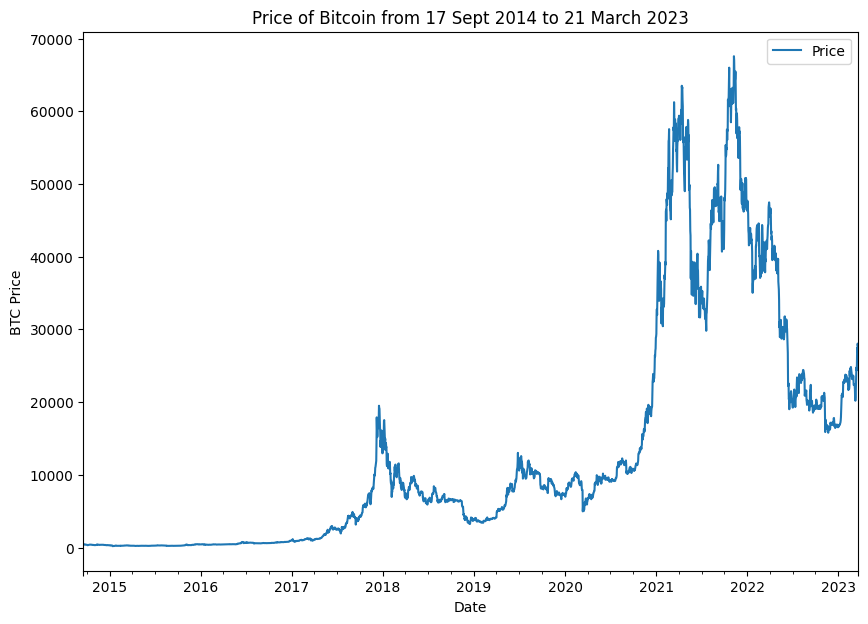

In [6]:
# let's plot everything
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.legend()
plt.title("Price of Bitcoin from 17 Sept 2014 to 21 March 2023");

### Formating the Dataset : Windowing

We've got to window our time series.

We want to use windows of the past to predict the future.

In [7]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
HORIZON = 1
WINDOW_SIZE = 7

In [8]:
split_size = int(0.8 * len(prices)) # 80% of train sets and 20% of test sets

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

In [9]:
# create a function which takes an array as input and return it in form of window and horizon
def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

To make a window for our time series dataset we need to create a function,

1. Create a window step of specific window size, for ex: [[0, 1, 2, 3, 4, 5, 6, 7]]
2. Uses Numpy indexing to create a 2D of multiple window steps, for example:
```
[0, 1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]
[2, 3, 4, 5, 6, 7, 8]
```
3. Uses the 2D array of multiple window steps to index on a target series.
4. Uses the  `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon.

In [10]:
import numpy as np

def make_windows(x, window_size=7, horizon=1):
  # 1
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # 2
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  # 3
  windowed_array = x[window_indexes]
  # 4
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

Let's try with bitcoin prices

In [11]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
# view first 3 windows/labels
for i in range(3):
  print(f'Window: {full_windows[i]} -> Label: {full_labels[i]}')

Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]


Turning windows into Training and Test sets:


In [12]:
def make_train_test_split(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [13]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

### Modelling Experiment

#### Model : 1 (Dense Model (window=7, horizon = 1))

In [14]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(17)

# construct a model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_1')


# compile a model
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# fit the model
model_1.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels))

Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 3814.2412 - mae: 3814.2412 - val_loss: 4828.8623 - val_mae: 4828.8623
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 832.1580 - mae: 832.1580 - val_loss: 1831.4994 - val_mae: 1831.4994
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 512.4908 - mae: 512.4908 - val_loss: 1511.9078 - val_mae: 1511.9078
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 462.9289 - mae: 462.9289 - val_loss: 1578.6743 - val_mae: 1578.6743
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 448.2374 - mae: 448.2374 - val_loss: 1404.5266 - val_mae: 1404.5266
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 427.3236 - mae: 427.3236 - val_loss: 1386.6532 - val_mae: 1386.6532
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 414.6257 - mae: 414.6257 - val_loss: 1335.9384 - val_mae: 1335.9384
Epoch 8/10

In [15]:
# evaluate the model
model_1.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 822.5856 - mae: 822.5856


[822.5855712890625, 822.5855712890625]

### Make prediction function

In [16]:
def make_prediction(model, input_data):
  y_preds = model.predict(input_data)
  return tf.squeeze(y_preds)

In [17]:
model_1_preds = make_prediction(model_1, test_windows)
model_1_preds[:10]

20/20 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33015.816, 33633.066, 33411.164, 34199.867, 33249.28 , 32613.102,
       32780.86 , 31828.254, 31419.75 , 31326.338], dtype=float32)>

### Make evaluation metric function

In [18]:
# creating our own MASE function

import tensorflow as tf

def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data)
  """
  mae = tf.reduce_mean(tf.abs(y_true, y_pred))

  naive_mae_no_seasonality = tf.reduce_mean(tf.abs(y_true[1:], y_true[:-1]))

  return mae / naive_mae_no_seasonality

In [19]:
# other evaluation metrics and then put together all
def evaluate_preds(y_true, y_pred):
  # make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.cast(y_pred, tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [20]:
# evaluation of Model 1
model_1_results = evaluate_preds(y_true= tf.squeeze(test_labels), y_pred = model_1_preds)
model_1_results

{'mae': 822.5855,
 'mse': 1533021.2,
 'rmse': 1238.1523,
 'mape': 2.381995,
 'mase': 1.0000142}

### Plot Model 1 results

In [21]:
# creating a plotting function also
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

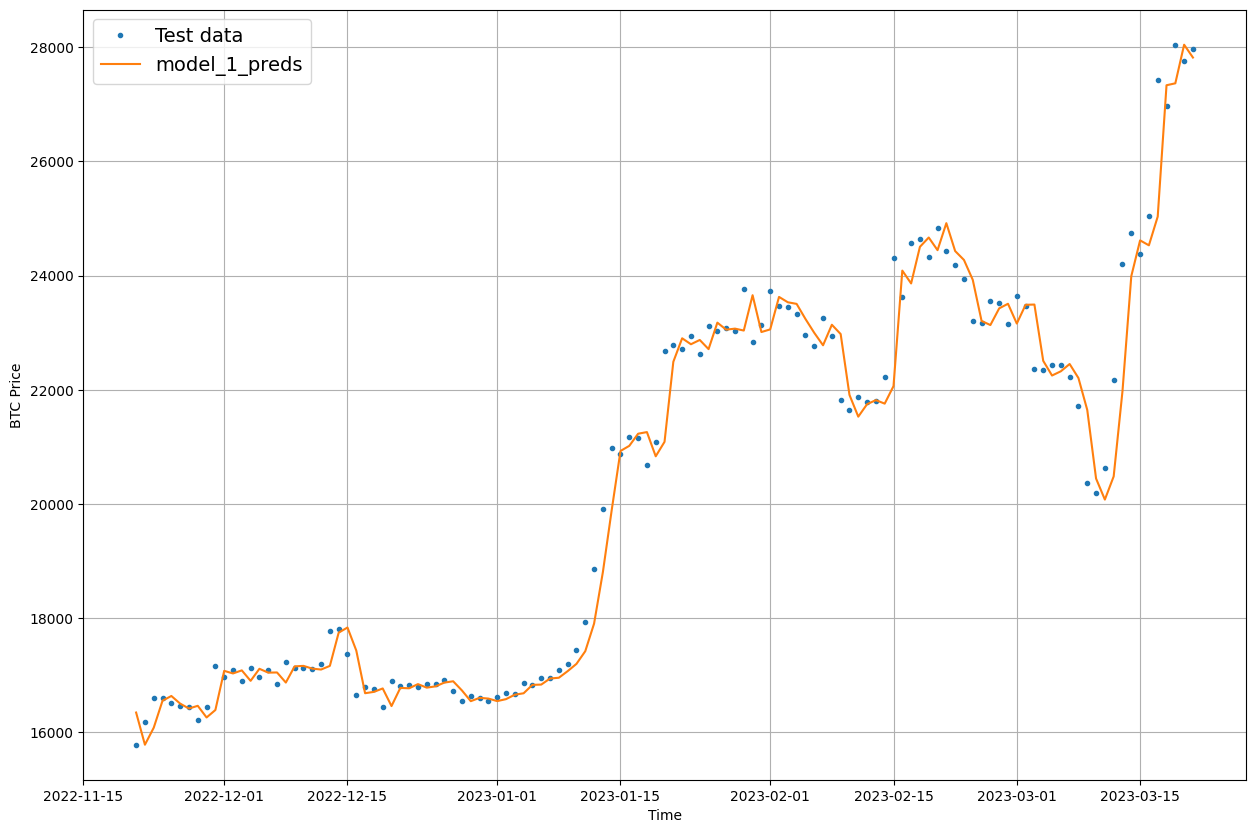

In [22]:
offset = 500
plt.figure(figsize=(15, 10))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format='-', label='model_1_preds')

### Model 2 : Dense (window=30, horizon=1)

In [23]:
HORIZON = 1
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
full_windows[:2], full_labels[:2]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985, 423.204987, 411.574005, 404.424988,
         399.519989, 377.181   , 375.46701 , 386.944   , 383.61499 ,
         375.071991, 359.511993, 328.865997, 320.51001 , 330.07901 ,
         336.187012, 352.940002, 365.026001, 361.562012, 362.299011,
         378.549011, 390.414001, 400.869995, 394.77301 , 382.556   ],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987, 411.574005, 404.424988, 399.519989,
         377.181   , 375.46701 , 386.944   , 383.61499 , 375.071991,
         359.511993, 328.865997, 320.51001 , 330.07901 , 336.187012,
         352.940002, 365.026001, 361.562012, 362.299011, 378.549011,
         390.414001, 400.869995, 394.77301 , 382.556   , 383.757996]]),
 array([[383.757996],
        [391.441986]]))

In [24]:
# create train and test split
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [25]:
# create model 2
tf.random.set_seed(17)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], 'model_2_dense')

# compile the model
model_2.compile(loss='mae',
                optimizer='Adam')

# fit the model
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels))

In [26]:
# evaluate the model
model_2.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 1ms/step - loss: 1024.1368


1024.1368408203125

In [27]:
# summary
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# prediction on model 2
model_2_preds = make_prediction(model_2, test_windows)
model_2_preds[:10]

20/20 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33420.453, 33107.56 , 32630.67 , 31938.088, 31305.797, 31515.482,
       31366.725, 30952.232, 31625.055, 32397.045], dtype=float32)>

In [29]:
# evaluate results
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 1024.1367,
 'mse': 2158565.5,
 'rmse': 1469.2057,
 'mape': 3.0153644,
 'mase': 0.99996686}

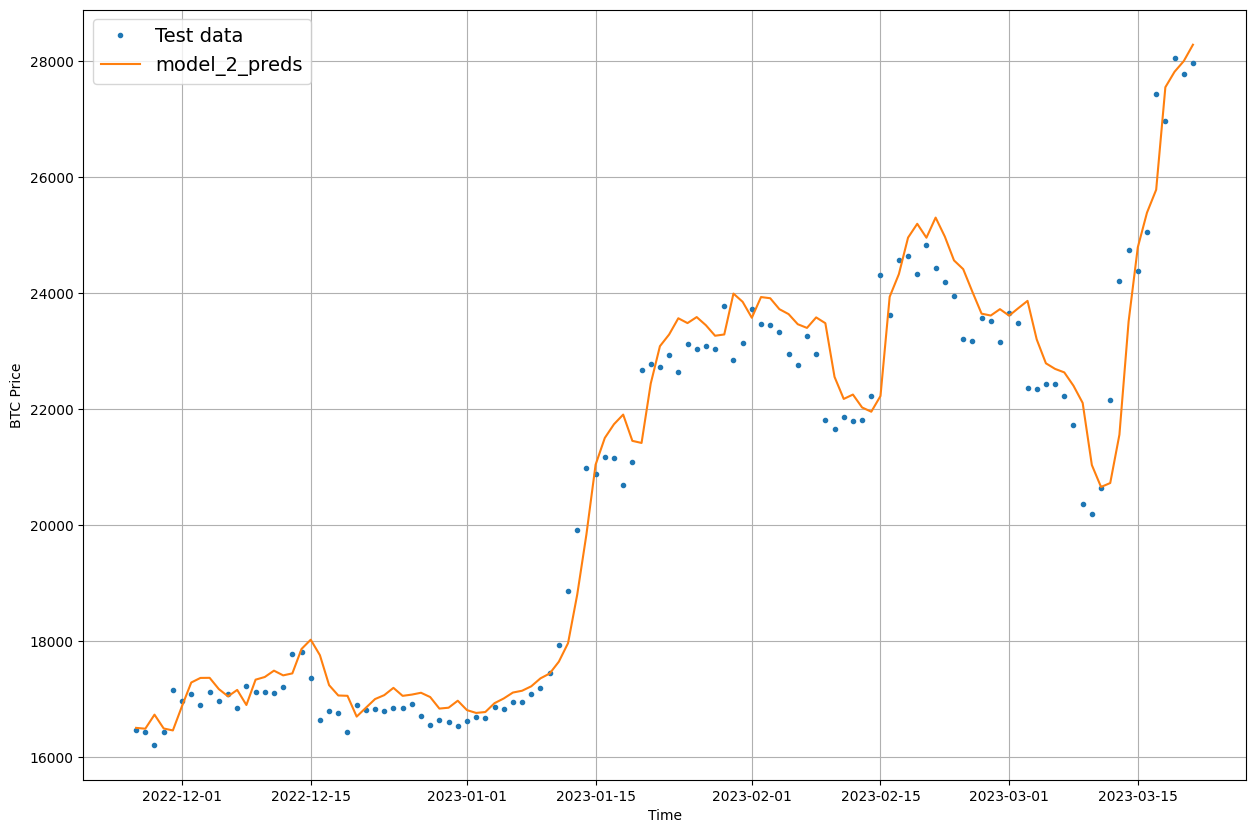

In [30]:
# plotting the model 2 results
offset = 500
plt.figure(figsize=(15, 10))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

### Model 3 : CNN (Conv1D)

We'll be using Conv1D model as it can be used for seq2seq (sequence to sequence) problems.

In our case, the input sequence is the previous 7 days of Bitcoin price data and the output is the next day (in seq2seq terms this is many to one problem).

In [31]:
HORIZON = 1
WINDOW_SIZE = 7

# make window and label dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

# make train test split
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

since in Conv1D layers, the shape of inputs into `batch_size + (timesteps, input_dim)`

In [32]:
train_windows[0].shape

(7,)

we need to convert this into `(7, 1)`, let's create a expand dim layer to convert the inputs shape inside the layer

In [33]:
expand_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [34]:
# create the model

tf.random.set_seed(17)

model_3 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(128, kernel_size=5, strides=1, padding='causal', activation='relu'),
  layers.Dense(HORIZON)
], 'model_3_cnn')


model_3.compile(loss='mae',
                optimizer='Adam')

# fit the model
model_3.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels))

Epoch 1/100
20/20 [==============================] - 1s 24ms/step - loss: 3063.2803 - val_loss: 5090.5210
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 729.4193 - val_loss: 1550.0820
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 506.8143 - val_loss: 1508.7904
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 472.6823 - val_loss: 1669.1183
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 468.5255 - val_loss: 1464.5052
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 450.6245 - val_loss: 1476.4579
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 440.5288 - val_loss: 1412.2141
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 447.3786 - val_loss: 1377.2042
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 434.2148 - val_loss: 1362.1948
Epoch 10/100
20/20 [==============================] - 0s 3ms/s

In [35]:
# evalute
model_3.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 2ms/step - loss: 834.6749


834.6749267578125

In [36]:
# predict
model_3_preds = make_prediction(model_3, test_windows)
model_3_preds[:5]

20/20 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([33049.863, 33603.07 , 33545.793, 34154.758, 33467.36 ],
      dtype=float32)>

In [37]:
# evaluate results
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': 834.67487,
 'mse': 1576833.4,
 'rmse': 1255.7202,
 'mape': 2.4181967,
 'mase': 1.0000142}

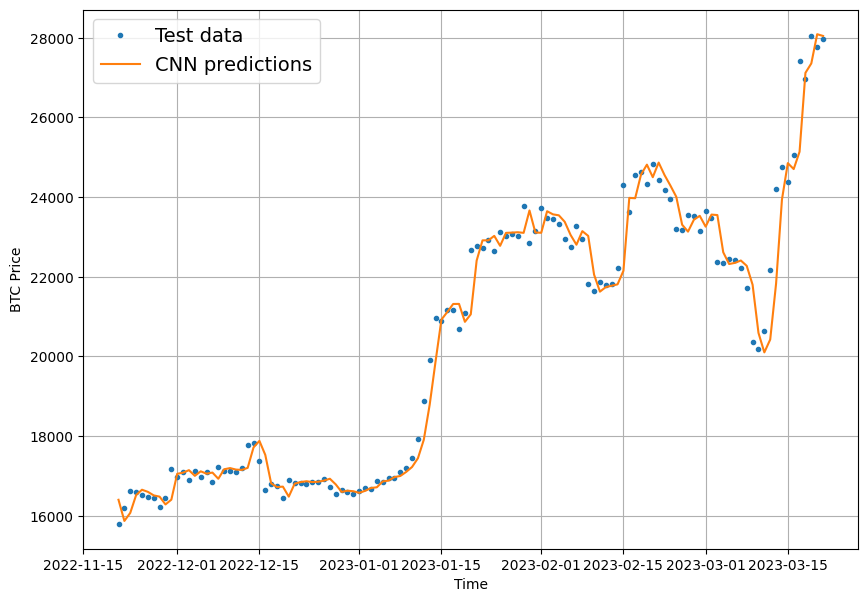

In [39]:
# plot the cnn results
offset = 500
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, format="-", label="CNN predictions")

### Model 4 : RNN (LSTM)

We can also use a recurrent neural network to model our sequential time series data.

We're not going to change the data, the data will be same just the model architecture would be different.

In [44]:
tf.random.set_seed(17)

# create a functional model
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation='relu', return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(HORIZON)(x)
model_4 = tf.keras.Model(inputs, output, name="RNN_LSTM")

# compile the model
model_4.compile(loss='mae',
                optimizer='adam')

# fit the model
model_4.fit(train_windows,
                train_labels,
                epochs=100,
                batch_size=128,
                verbose=0,
                validation_data=(test_windows, test_labels))

In [45]:
model_4.summary()

Model: "RNN_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_6 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm_9 (LSTM)               (None, 1, 128)            69632     
                                                                 
 lstm_10 (LSTM)              (None, 128)               131584    
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 205377 (802.25 KB)
Trainable params: 205377 

In [46]:
# evaluate the model
model_4.evaluate(test_windows, test_labels)

20/20 [==============================] - 0s 6ms/step - loss: 915.2114


915.21142578125

In [47]:
# make prediction
model_4_preds = make_prediction(model_4, test_windows)
model_4_preds[:2]

20/20 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([32559.055, 33256.36 ], dtype=float32)>

In [48]:
# evaluate the results
model_4_results = evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 915.2114,
 'mse': 1741020.5,
 'rmse': 1319.4774,
 'mape': 2.653369,
 'mase': 1.0000142}

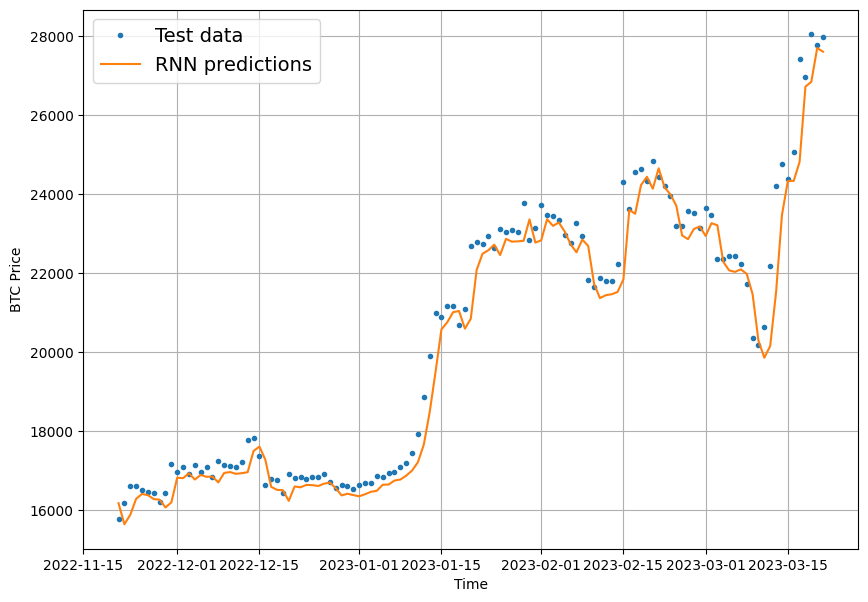

In [52]:
# plot the timeseries
offset = 500
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_4_preds, start=offset, format="-", label="RNN predictions")

### Compare all the model results

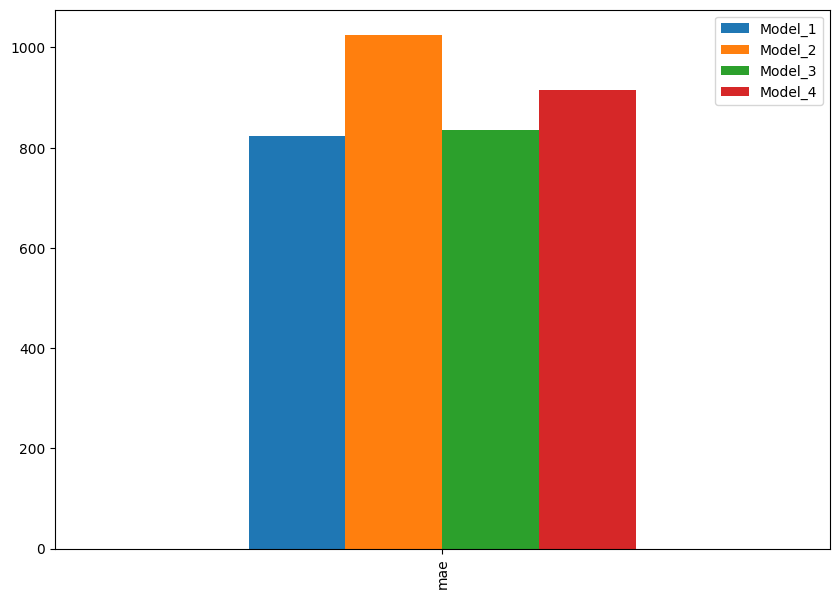

In [54]:
model_results = pd.DataFrame({"Model_1":model_1_results['mae'],
                              "Model_2":model_2_results['mae'],
                              "Model_3":model_3_results['mae'],
                              "Model_4":model_4_results['mae']}, index=["mae"])
model_results.plot(kind='bar', figsize=(10,7));

`Model_1` has the very low mae, so let's consider that model for further experiments.

### Make a multivariate time series

Since we experimented using a single price factor, there could be other factors as well which could impact the price so let's consider those and create a multivariate time series dataset.

In [56]:
# block reward values
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25
block_reward_5 = 3.125

# block reward dates
block_reward_1_date = np.datetime64("2009-01-03")
block_reward_2_date = np.datetime64("2012-11-28")
block_reward_3_date = np.datetime64("2016-07-09")
block_reward_4_date = np.datetime64("2020-05-11")
block_reward_5_date = np.datetime64("2024-04-01")


# get the number of days fall between block between reward dates in our time series dataset
block_reward_2_days = (block_reward_3_date - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_date - bitcoin_prices.index[0]).days
block_reward_4_days = (block_reward_5_date - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days, block_reward_4_days

(661, 2063, 3484)

now let's add the new feature `block_reward` in our dataset

In [58]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Sety the values of block_reward column
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:block_reward_4_days, -1] = block_reward_4
bitcoin_prices_block.iloc[block_reward_4_days:, -1] = block_reward_5

In [59]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


In [60]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2023-03-17,27423.929688,6.25
2023-03-18,26965.878906,6.25
2023-03-19,28038.675781,6.25
2023-03-20,27767.236328,6.25
2023-03-21,27964.888672,6.25


Let's plot it to see how it looks like together.

<Axes: xlabel='Date'>

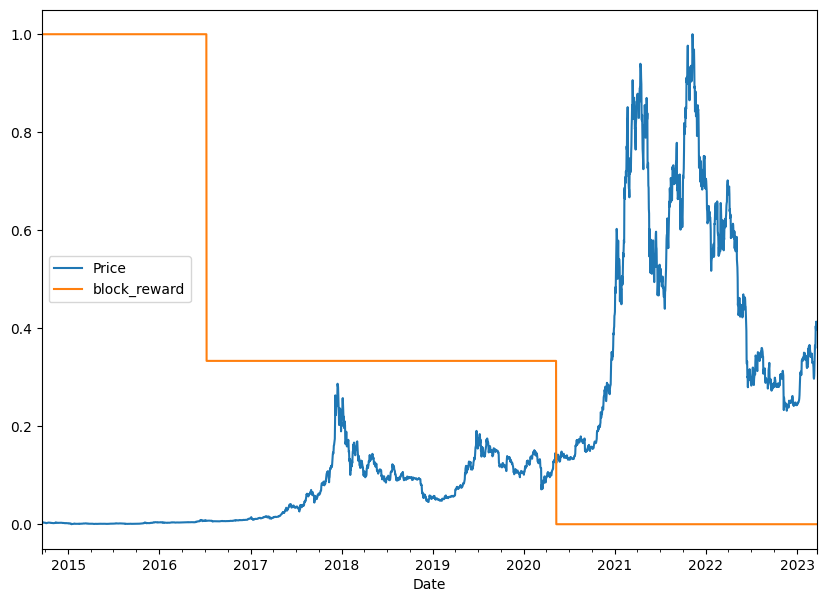

In [61]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10, 7))

### Making a window set using pandas

In pandas, there is a function called `.shift()` which can be used to create windows on multivariate time series dataset.

In [62]:
HORIZON = 1
WINDOW_SIZE = 7

bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


Alright we need to drop NaNs and make feature set and label set.

In [69]:
X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

# make train test split
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

X_train.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


### Model 5 : Multivariate Dense Model

#### dynamically adjust learning rate callback function for our multivariate model

In [66]:
reducingLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.2,
                                                  min_lr=0.001,
                                                  patience=2)

In [70]:
tf.random.set_seed(17)

# create model
model_5 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
],'multivariate_model')

# compile the model
model_5.compile(loss='mae',
                optimizer='adam')

# fit the model
history_5 = model_5.fit(X_train,
                        y_train,
                        epochs=100,
                        batch_size=128,
                        verbose=1,
                        validation_data=(X_test, y_test),
                        callbacks=[reducingLR])

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 4362.5991 - val_loss: 3648.4963 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 974.9758 - val_loss: 2679.8945 - lr: 0.0010
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 556.0129 - val_loss: 1589.5270 - lr: 0.0010
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 461.0294 - val_loss: 1539.7358 - lr: 0.0010
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 432.8983 - val_loss: 1324.9263 - lr: 0.0010
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 410.4376 - val_loss: 1409.2996 - lr: 0.0010
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 400.1971 - val_loss: 1255.2612 - lr: 0.0010
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 411.5018 - val_loss: 1186.3948 - lr: 0.0010
Epoch 9/100
20/20 [==============================] - 0s 5ms/st

In [71]:
# evaluate preds
model_5_preds = make_prediction(model_5, X_test)
model_5_preds[:2]

20/20 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([32961.508, 33674.766], dtype=float32)>

In [73]:
model_5_results = evaluate_preds(tf.squeeze(y_test), model_5_preds)
model_5_results

{'mae': 822.94214,
 'mse': 1530227.5,
 'rmse': 1237.0237,
 'mape': 2.3798416,
 'mase': 1.0000142}